In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
time_data = pd.read_excel('data/time_data.xlsx')
time_data.head()

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


Text(0.5, 1.0, 'Распределеие времени в группе В')

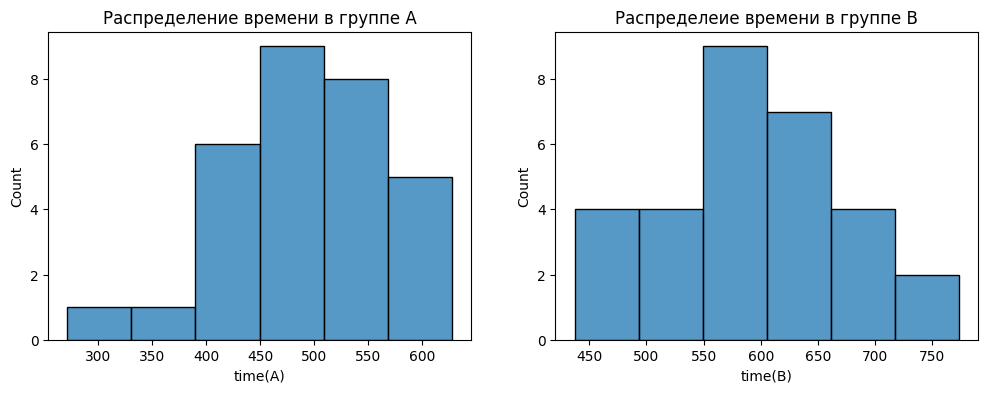

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=time_data, x='time(A)', ax = axes[0])
sns.histplot(data=time_data, x='time(B)', ax = axes[1])
axes[0].set_title('Распределение времени в группе А')
axes[1].set_title('Распределеие времени в группе В')


In [4]:
from scipy.stats import shapiro
H0 = 'Распределения нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05
shapiro_a = shapiro(time_data['time(A)'])
shapiro_b = shapiro(time_data['time(B)'])
print('p-value группы А ', round(shapiro_a.pvalue, 2))
print('p-value группы В ', round(shapiro_b.pvalue, 2))
if shapiro_a.pvalue<alpha or shapiro_b.pvalue<alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H1))
else:
    print('Принимаем нулевую гипотезу: {}'.format(H0))

p-value группы А  0.43
p-value группы В  0.12
Принимаем нулевую гипотезу: Распределения нормальные


In [5]:
from scipy.stats import ttest_ind
H0 = 'Время в группах одинаковое'
H1 = 'Время в группе А меньше, чем в группе В'
alpha = 0.05
results = ttest_ind(a=time_data['time(A)'], b=time_data['time(B)'], alternative='less')
print('p-value:', round(results.pvalue, 2))
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H1))
else:
    print('Принимаем нулевую гипотезу: {}'.format(H0))

p-value: 0.0
Отвергаем нулевую гипотезу. Время в группе А меньше, чем в группе В


In [8]:
n = 64
x_mean = 12.35
sigma = 2.4
gamma = 0.9
alpha = 1-gamma

from scipy.stats import norm
z_crit = -norm.ppf(alpha/2)

eps = z_crit*sigma/(n**0.5)
lower_bound = x_mean-eps
upper_bound = x_mean+eps
conf_interval = (round(lower_bound, 2), round(upper_bound, 2))
print('Доверительный интервал: {}, z_crit: {}, low: {}, up: {}'.format(conf_interval, z_crit, lower_bound, upper_bound))

Доверительный интервал: (11.86, 12.84), z_crit: 1.6448536269514729, low: 11.856543911914558, up: 12.843456088085441


In [12]:
n = 25
k= n-1
x_mean = 3540
x_std = 1150
gamma = 0.9
alpha = 1- gamma

from scipy.stats import t
t_crit = -t.ppf(alpha/2, k)

eps = t_crit*x_std/(n**0.5)
lower_bound = round(x_mean - eps)
upper_bound = round(x_mean + eps)
conf_interval = (round(lower_bound), round(upper_bound))
print('Доверительный интервал: {}, low {}, up {}'.format(conf_interval, lower_bound, upper_bound))

Доверительный интервал: (3146, 3934), low 3146, up 3934
